# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
names = ['id','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
# Load data set and display first few observations
dataset = pd.read_csv("breast-cancer-wisconsin.data.txt", names = names)
dataset.head(10)

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Observations:
### Id columns is to identify rows hence can be skipped in analysis
### All columns have numerical values
### Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


## Observations:
### Bare_Nuclei feature is missing in the describe output. Bare_Nuclei feature should have numeric values, but here the datatype is object. Some issues/errors might be there in the data which needs to be rectified. Based on Mean and Median values, we can see that there are lot of skewness in the data.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


Count of null values in each feature:
 id                             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


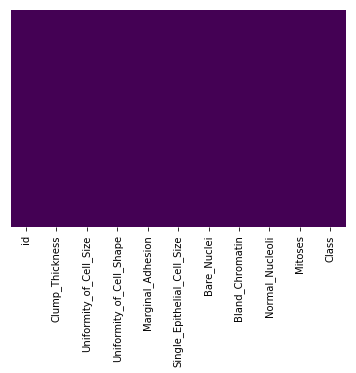

In [5]:
# Checking for missing value 
print ("Count of null values in each feature:\n",dataset.isna().sum())
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Observations:
### There is no missing values in any of the columns. Next let us check for any incorrect data.

In [6]:
# We could see "?" values in column, this should be removed from data set
dataset[dataset.Bare_Nuclei.str.isdigit() == False]

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [7]:
# Get count of rows having ?
print ("\nCount of rows having ?: ",(dataset.Bare_Nuclei.str.isdigit() == False).sum())


Count of rows having ?:  16


## Observations:
### 16 values in Bare_Nuclei feature have incorrect data. We can delete them as it forms roughly 2% of data. Here let us check and impute it with the suitable values (mean/median).

In [8]:
dataset = dataset.replace('?', np.nan)
dataset['Bare_Nuclei'] = dataset['Bare_Nuclei'].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


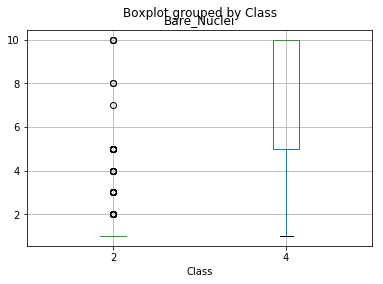

In [9]:
#sns.boxplot(dataset['Bare_Nuclei'])
dataset.boxplot(column='Bare_Nuclei', by = "Class")

C:\Users\Iyyappan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


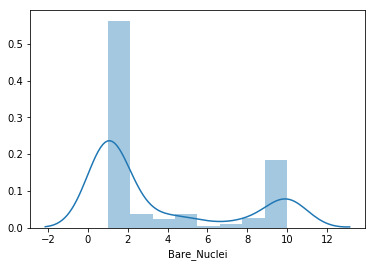

In [10]:
Bare_Nuclei = dataset['Bare_Nuclei'].dropna()
sns.distplot(Bare_Nuclei)

## Observations:
### From the above boxplot we an infer that the Bare_Nuclei values are not normally distributed. Outliers are there in Class=2 (benign cancer). We can see 2 clusters. So let us impute the '?' value with median grouped by Class.

In [11]:
# Treating missing values in Bare_Nuclei with median
print ("Before missing value treatment: ")
print (dataset.isna().sum())
print ("=======================================")
#dataset = dataset.fillna(dataset.median())
dataset.Bare_Nuclei = dataset.groupby(['Class'])['Bare_Nuclei'].apply(lambda x: x.fillna(x.median()))
print ("After missing value treatment: ")
print (dataset.isna().sum())

Before missing value treatment: 
id                              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
After missing value treatment: 
id                             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [12]:
#Dropping the id column as it is not required for our analysis.
dataset.drop(['id'], axis=1, inplace=True)

## Observations:
### There is no null values.
### As the Bare_Nuclei feature had "?" as value, the datatype of it is taken as object. Now we have identified and replaced it with median value grouped by Class. Now the incorrect value is treated and data is ready for anlysis.

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


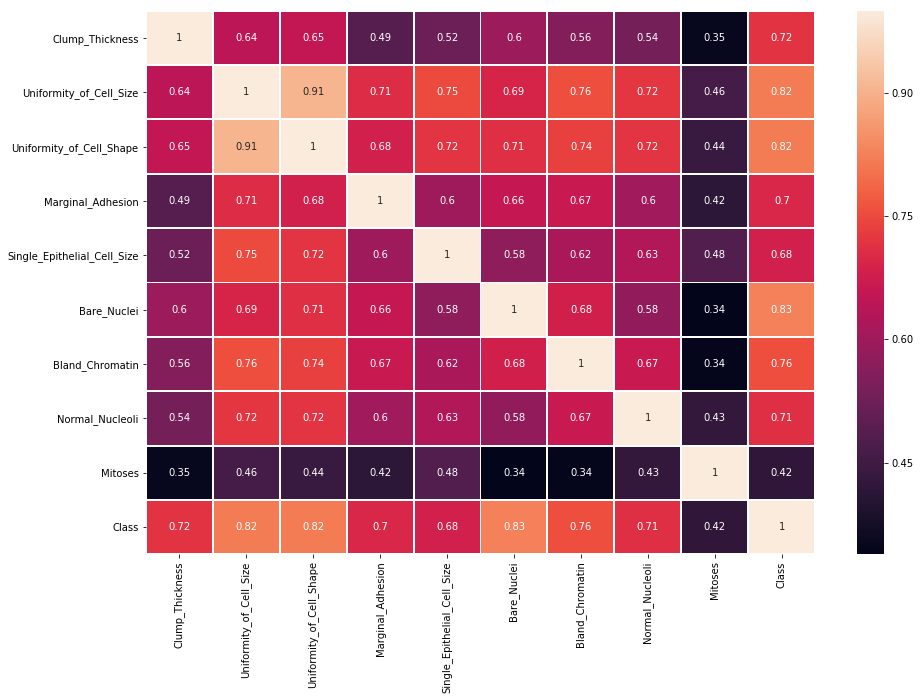

In [13]:
# Check for correlation of variable
plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, linewidths=1)

## Observations:

### Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
### and bland chromatin
### Target variable shows high correlation with most of these variables.
### Let us list down the positive, negative or nill correlation between features.

In [14]:
CorrMat = dataset.corr()
indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("All the attributes have some corrrelation between them.")
else:
    print ("There is no significant correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
    print("====================================================================")
    indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
    indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == -1]
    if len(indices) == 0:
        print ('All the attributes have some corrrelation with class.')
    else:
        print ("There is no significant correlation between class and the following attributes: ", indices)

All the attributes have some corrrelation between them.


In [15]:
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant positive correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 9]
print ("There is significant positive correlation between class and the following attributes: ", indices)

There is significant positive correlation between the following attributes: 
------------------------------------------------------------------------
[('Clump_Thickness', 'Uniformity_of_Cell_Size'), ('Clump_Thickness', 'Uniformity_of_Cell_Shape'), ('Clump_Thickness', 'Marginal_Adhesion'), ('Clump_Thickness', 'Single_Epithelial_Cell_Size'), ('Clump_Thickness', 'Bare_Nuclei'), ('Clump_Thickness', 'Bland_Chromatin'), ('Clump_Thickness', 'Normal_Nucleoli'), ('Clump_Thickness', 'Mitoses'), ('Clump_Thickness', 'Class'), ('Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape'), ('Uniformity_of_Cell_Size', 'Marginal_Adhesion'), ('Uniformity_of_Cell_Size', 'Single_Epithelial_Cell_Size'), ('Uniformity_of_Cell_Size', 'Bare_Nuclei'), ('Uniformity_of_Cell_Size', 'Bland_Chromatin'), ('Uniformity_of_Cell_Size', 'Normal_Nucleoli'), ('Uniformity_of_Cell_Size', 'Mitoses'), ('Uniformity_of_Cell_Size', 'Class'), ('Uniformity_of_Cell_Shape', 'Marginal_Adhesion'), ('Uniformity_of_Cell_Shape', 'Single_Epithel

In [16]:
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("There is no signigicant negative correleation between attributes.")
else:
    print ("There is significant negative correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
print("====================================================================")
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 9]

if len(indices) == 0:
    print ("Class do not have negative correlation with any attributes.")
else:
    print ("There is significant negative correlation between class and the following attributes: ", indices)

There is no signigicant negative correleation between attributes.
Class do not have negative correlation with any attributes.


C:\Users\Iyyappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Iyyappan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


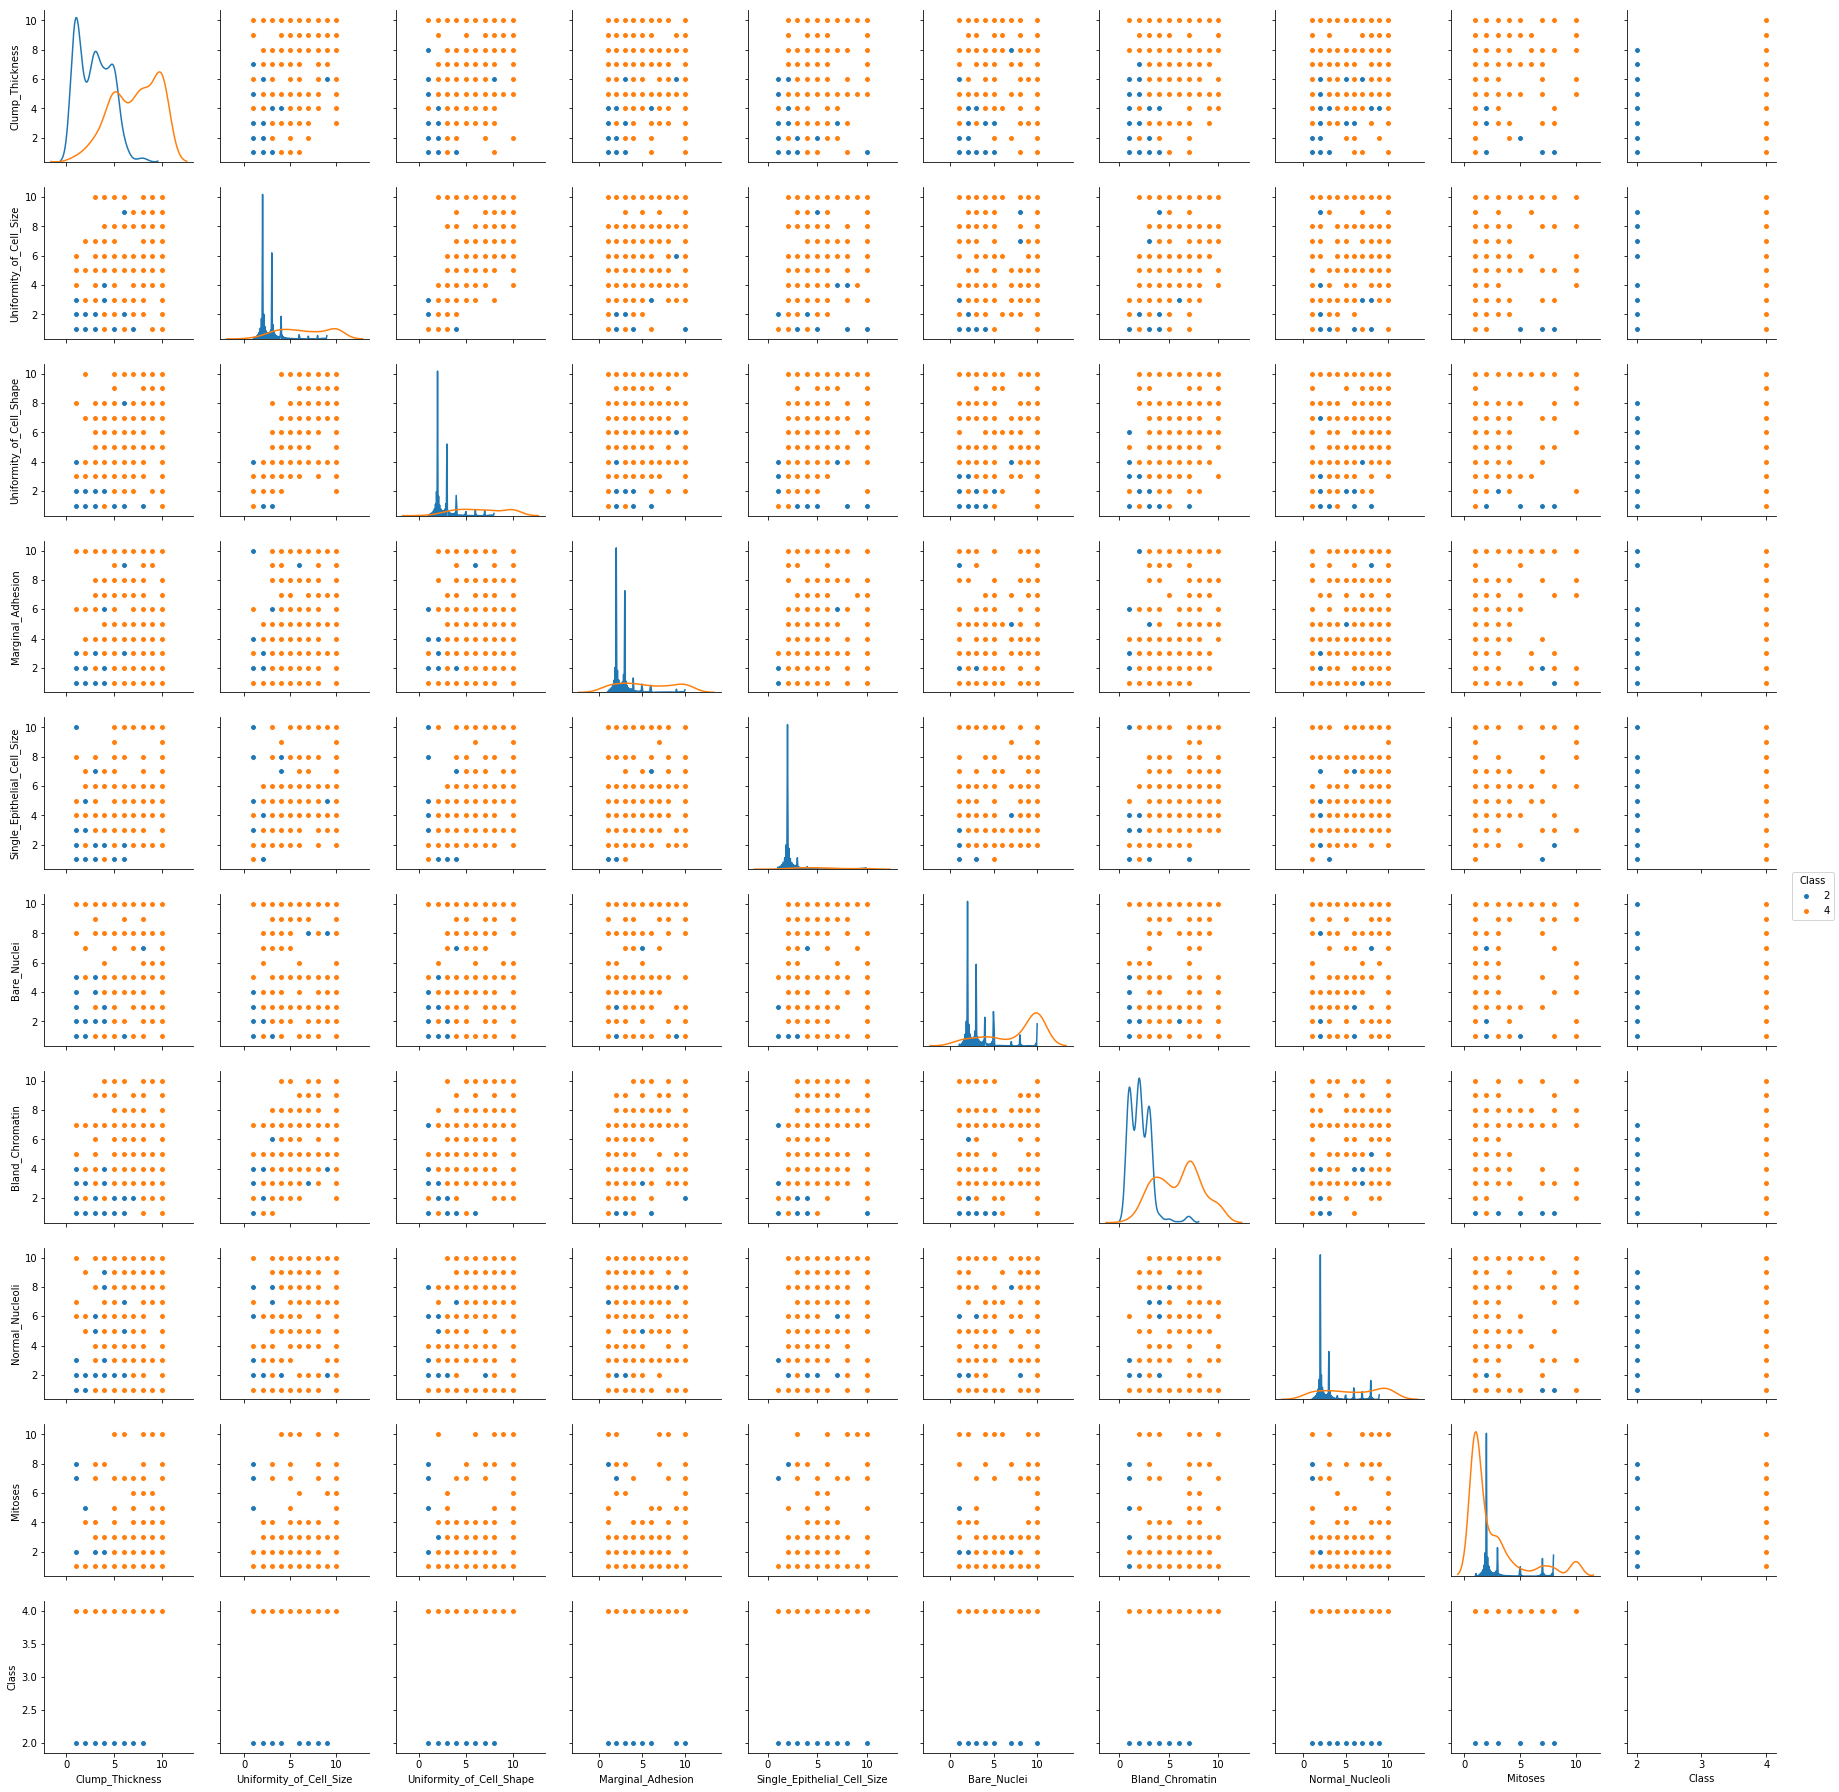

In [17]:
#Let us check for pair plots
sns.pairplot(dataset, diag_kind='kde', hue = 'Class')

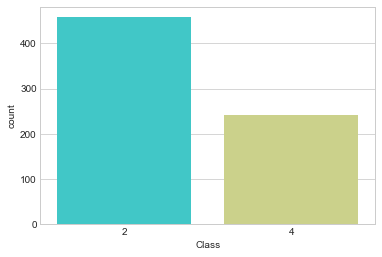

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=dataset,palette='rainbow')

## Observations:
### Have listed the correlation between attributes in the above outputs.
### Relationship between variables shows some correlation.
### The correlations are not linear.
### class seams to have correlation with all the features.
### The datas are more right skewed. Outlier treatment should be done.
### Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is Between 1 to 10
### We have very less data for Malignant (Class=4). The output can be biased towards Benign (Class=2).

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [19]:
# Have aleardy removed the ID column before correlation analysis.

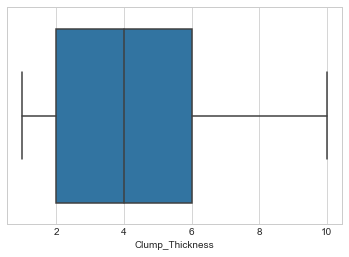

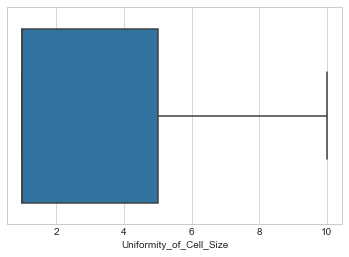

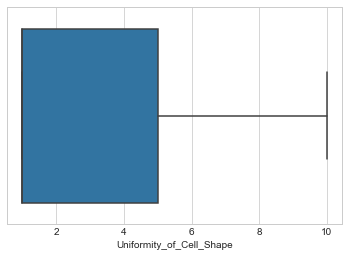

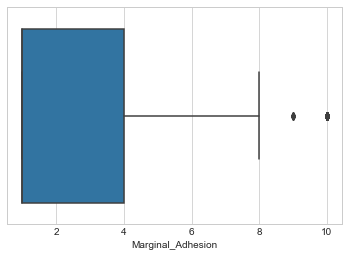

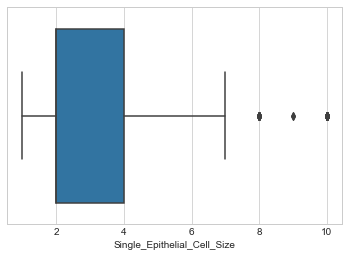

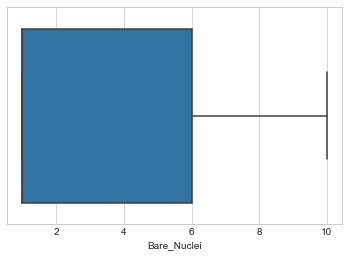

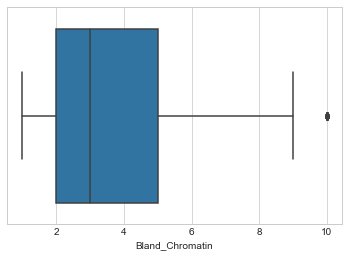

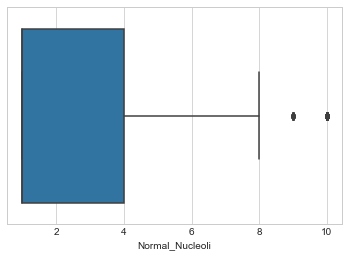

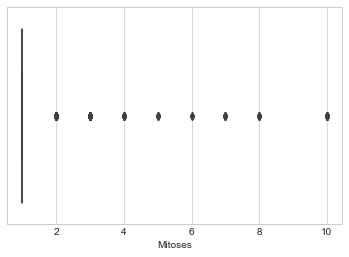

<Figure size 432x288 with 0 Axes>

In [20]:
for i, col in enumerate(dataset):
    plt.figure(i)
    if (col != 'Class'):
        sns.boxplot(dataset[col])

## Observations:
### Mitoses have more outliers.
### Normal_Nucleoli, Bland_Chromatin, Single_Epithelial_Cell_Size, Marginal_Adhesion have some outliers.
### Not removing the outliers as we have more outliers and this is a sensitive medical data.
### So before standardization let us split train and test dataset to avoid the influence of test dataset in training dataset.

In [21]:
from sklearn import model_selection
X = dataset.iloc[:,:-1]
y = dataset['Class']
test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [22]:
from scipy.stats import zscore

#Remove outliers after standerdization
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

# Q6 Create a covariance matrix for identifying Principal components

In [23]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00204918 0.6427667  0.65796437 0.46857177 0.51472692 0.58472952
  0.56416234 0.51914849 0.32296377]
 [0.6427667  1.00204918 0.91043389 0.70488408 0.74275024 0.68281121
  0.76257447 0.70227554 0.44716869]
 [0.65796437 0.91043389 1.00204918 0.6708164  0.70679256 0.69577588
  0.74286655 0.69849391 0.41368139]
 [0.46857177 0.70488408 0.6708164  1.00204918 0.59961577 0.62449652
  0.64220768 0.58078889 0.43751211]
 [0.51472692 0.74275024 0.70679256 0.59961577 1.00204918 0.57203857
  0.634409   0.62191394 0.47424065]
 [0.58472952 0.68281121 0.69577588 0.62449652 0.57203857 1.00204918
  0.68451741 0.55780366 0.32542653]
 [0.56416234 0.76257447 0.74286655 0.64220768 0.634409   0.68451741
  1.00204918 0.66059458 0.32789725]
 [0.51914849 0.70227554 0.69849391 0.58078889 0.62191394 0.55780366
  0.66059458 1.00204918 0.39309833]
 [0.32296377 0.44716869 0.41368139 0.43751211 0.47424065 0.32542653
  0.32789725 0.39309833 1.00204918]]


# Q7 Identify eigen values and eigen vector

In [24]:
# Step 2- Get eigen values and eigen vector

In [25]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30307623  0.21831899 -0.01307634  0.83162695 -0.24664508  0.17424089
   0.26882746  0.07167821 -0.0103722 ]
 [-0.38388176  0.0532597  -0.73973431 -0.03771801  0.32479561 -0.3389904
   0.16976949 -0.19487054 -0.11817701]
 [-0.37861205  0.11053588  0.66295696  0.02481238  0.47192642 -0.35549703
   0.13695967 -0.14760782 -0.12111336]
 [-0.33033269 -0.09065586  0.0525562  -0.39343201 -0.13885461  0.24599879
   0.62836479  0.09237216  0.49187396]
 [-0.33842742 -0.16607313  0.0610322  -0.13050431 -0.22411475  0.44339405
  -0.16376492 -0.68052845 -0.316807  ]
 [-0.33195968  0.23686903 -0.05256872  0.03974874  0.29231833  0.27464702
  -0.59740471  0.06319574  0.55460375]
 [-0.35080999  0.21979123  0.05559824 -0.19966009 -0.66771695 -0.5081928
  -0.26424905  0.10594309  0.02261655]
 [-0.33156804  0.00822035 -0.02141188 -0.20281703  0.09998042  0.3251723
  -0.06813259  0.65162041 -0.55083348]
 [-0.22489434 -0.89274889  0.0176079   0.22794588 -0.01262601 -0.17834197
  -0.16

In [26]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.824691015844599, array([-0.30307623, -0.38388176, -0.37861205, -0.33033269, -0.33842742,
       -0.33195968, -0.35080999, -0.33156804, -0.22489434])), (0.8071299001102701, array([ 0.21831899,  0.0532597 ,  0.11053588, -0.09065586, -0.16607313,
        0.23686903,  0.21979123,  0.00822035, -0.89274889])), (0.5444933402736891, array([ 0.83162695, -0.03771801,  0.02481238, -0.39343201, -0.13050431,
        0.03974874, -0.19966009, -0.20281703,  0.22794588])), (0.4721563948090446, array([-0.0103722 , -0.11817701, -0.12111336,  0.49187396, -0.316807  ,
        0.55460375,  0.02261655, -0.55083348,  0.1320498 ])), (0.3779536462611891, array([ 0.07167821, -0.19487054, -0.14760782,  0.09237216, -0.68052845,
        0.06319574,  0.10594309,  0.65162041,  0.15369209])), (0.34144398691397526, array([ 0.26882746,  0.16976949,  0.13695967,  0.62836479, -0.16376492,
       -0.59740471, -0.26424905, -0.06813259, -0.16470858])), (0.29500798676442486, array([ 0.17424089, -0.3389904 , -0.35549703,  

# Q8 Find variance and cumulative variance by each eigen vector

In [27]:
tot = sum(eigvalues_sorted)
var_exp = [( i /tot ) * 100 for i in sorted(eigvalues_sorted, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.5864398   73.53621011  79.57376408  84.80921785  89.00011491
  92.78617866  96.05734197  99.03527756 100.        ]


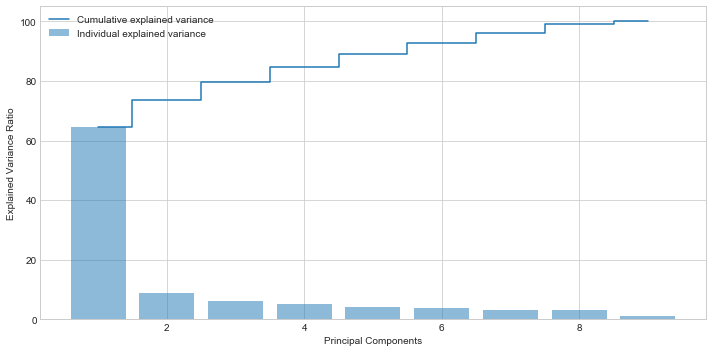

In [28]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [29]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(5.824691015844599,
  array([-0.30307623, -0.38388176, -0.37861205, -0.33033269, -0.33842742,
         -0.33195968, -0.35080999, -0.33156804, -0.22489434])),
 (0.8071299001102701,
  array([ 0.21831899,  0.0532597 ,  0.11053588, -0.09065586, -0.16607313,
          0.23686903,  0.21979123,  0.00822035, -0.89274889])),
 (0.5444933402736891,
  array([ 0.83162695, -0.03771801,  0.02481238, -0.39343201, -0.13050431,
          0.03974874, -0.19966009, -0.20281703,  0.22794588])),
 (0.4721563948090446,
  array([-0.0103722 , -0.11817701, -0.12111336,  0.49187396, -0.316807  ,
          0.55460375,  0.02261655, -0.55083348,  0.1320498 ])),
 (0.3779536462611891,
  array([ 0.07167821, -0.19487054, -0.14760782,  0.09237216, -0.68052845,
          0.06319574,  0.10594309,  0.65162041,  0.15369209])),
 (0.34144398691397526,
  array([ 0.26882746,  0.16976949,  0.13695967,  0.62836479, -0.16376492,
         -0.59740471, -0.26424905, -0.06813259, -0.16470858])),
 (0.29500798676442486,
  array([ 0.17424

In [30]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 9 to 8 dimension space as the 9 the dimension have very less variance.

X_std_8D = np.dot(X_train,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

In [31]:
X_train.shape, P_reduce.shape, X_std_8D.shape

((489, 9), (8, 9), (489, 8))

# Q10 Find correlation between components and features

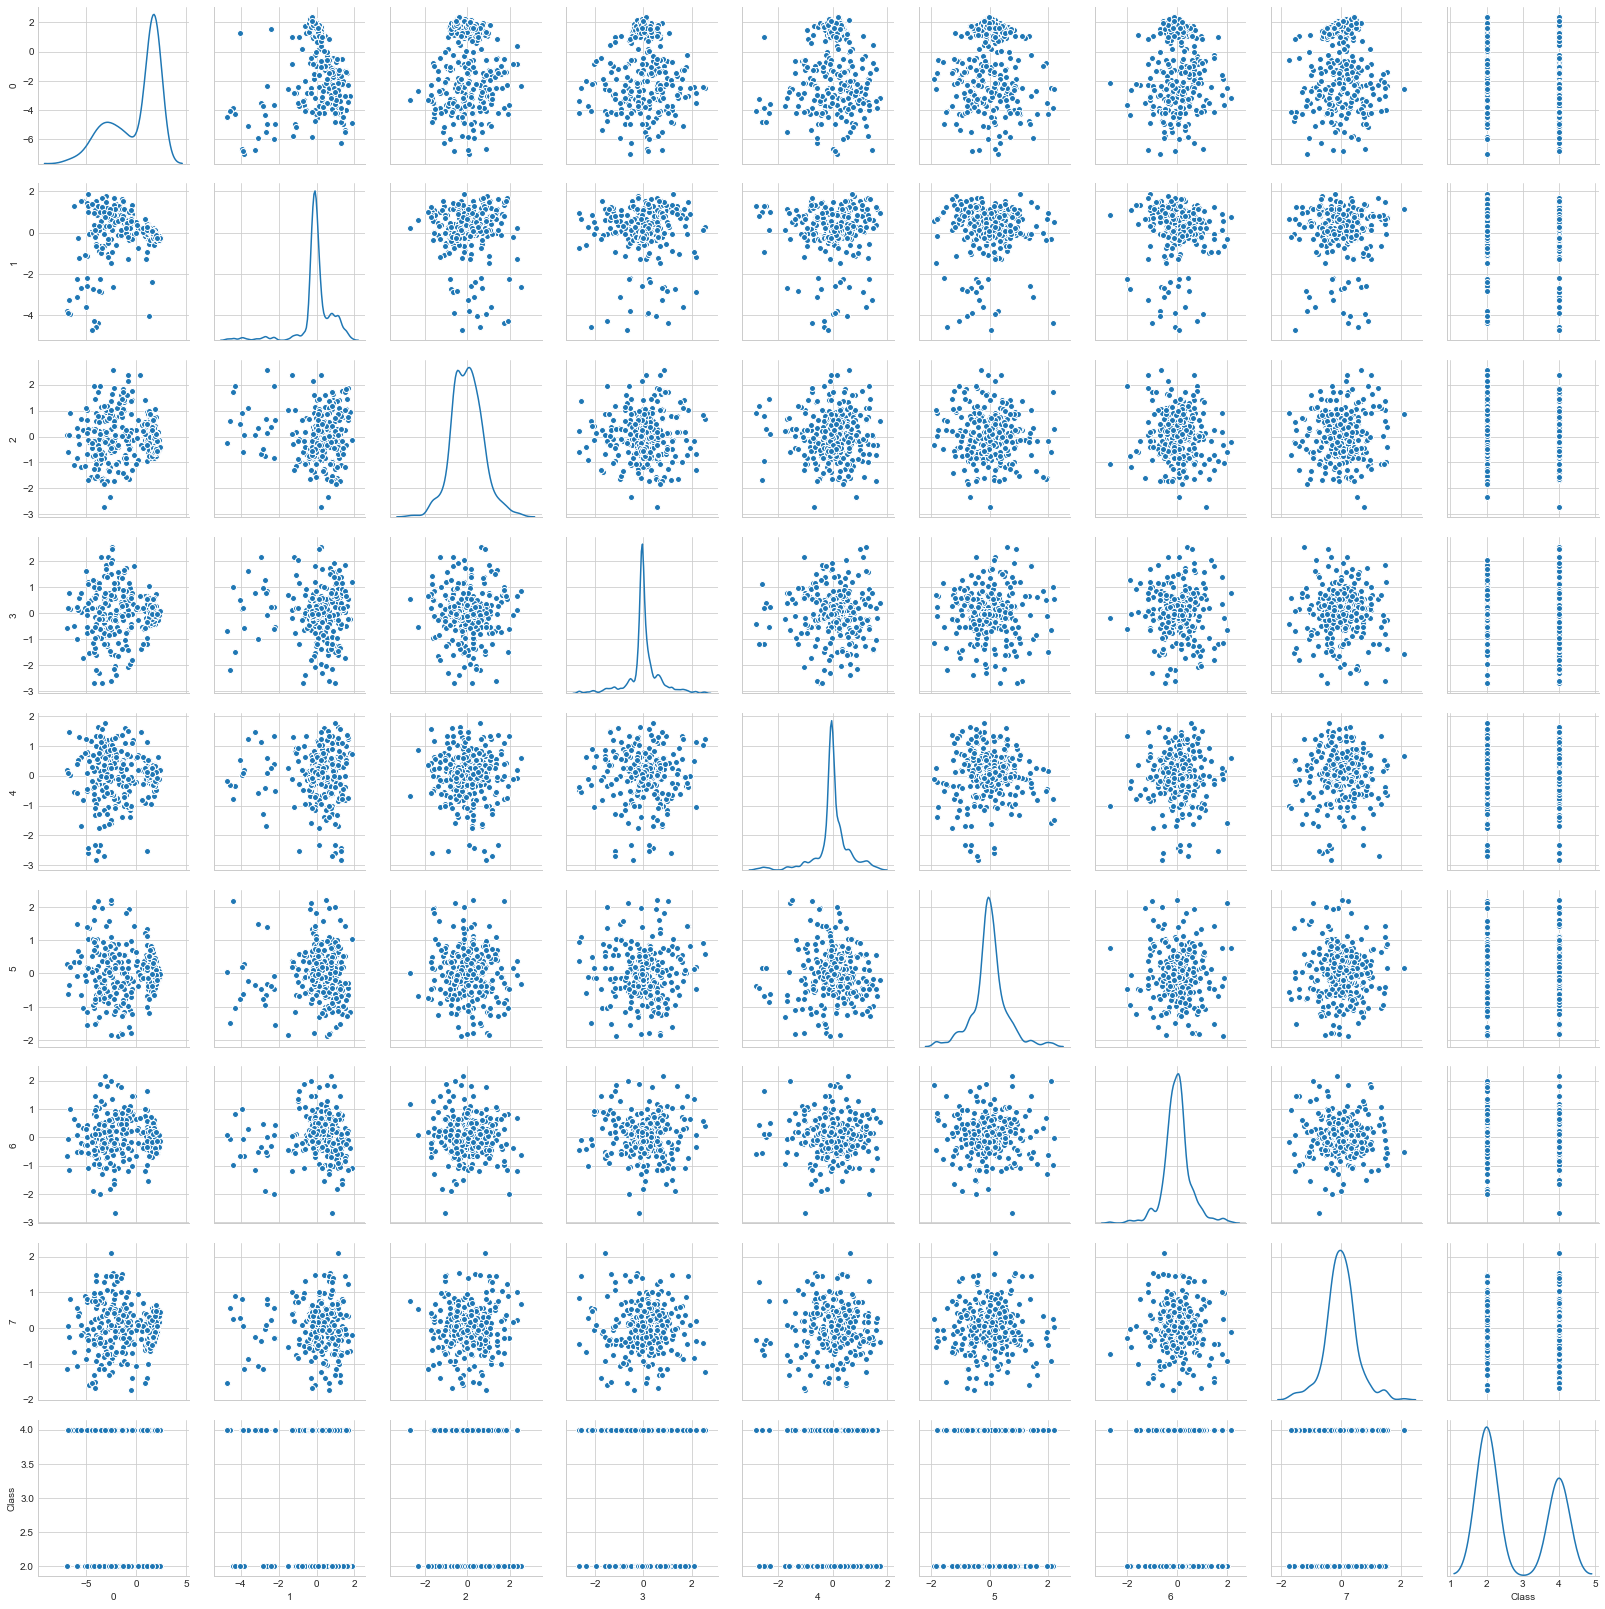

In [32]:
Proj_data_Class_df = Proj_data_df.join(y)
sns.pairplot(Proj_data_Class_df, diag_kind='kde') 

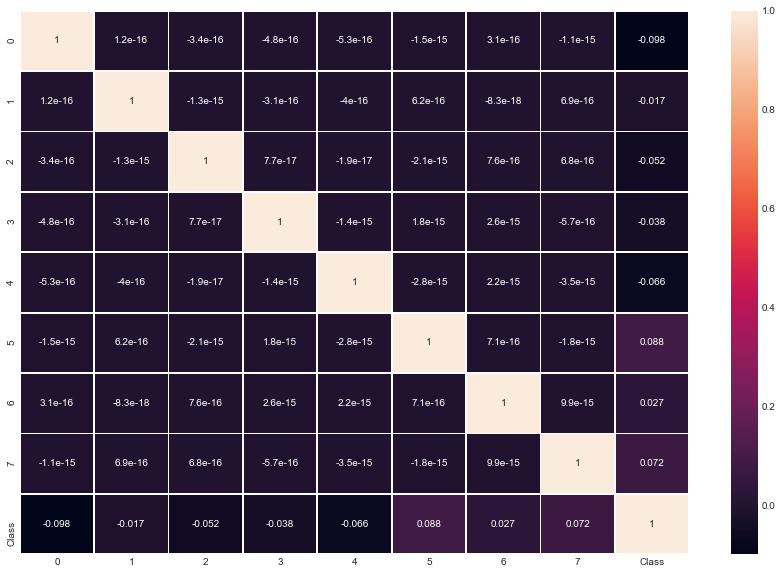

In [33]:
# Check for correlation of variable
plt.subplots(figsize=(15,10))
sns.heatmap(Proj_data_Class_df.corr(), annot=True, linewidths=1)

## Observations:
### There is no significant correlation between target (Class) and any of the PCA.
### What was clearly visible as separate gaussians in original dimension is not visible any more. This is due to the fact that PCA dimesions are composite of the original dimensions
### As the original dimensions does not have a liniear correlation, using PCA in this data will not be effective.
### Also the data have outliers. We have not treated outliers due to the sensitivity of the data. PCA will not be effective with outliers.

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [34]:
# Load data set and display first few observations
Jokes_data = pd.read_csv("jokes.csv")
Jokes_data.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [35]:
#Taking only the first 200 rows of the dataset and all columns except NumJokes
ratings_df = Jokes_data.iloc[:200, 1:]
ratings_df.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [36]:
#Column indices are already from 0 to 99. So not changing the indices.
#Column Names are from Joke1....Joke100.
#ratings_df.columns.get_indexer
print ("Index of the first column: ", ratings_df.columns.get_loc("Joke1"))
print ("Index of the last column: ", ratings_df.columns.get_loc("Joke100"))

Index of the first column:  0
Index of the last column:  99


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [37]:
#Getting the count of null ratings in each column.
print("Count of null ratings (99.00) in each column:\n")
for column in ratings_df:
    print (column + " " + str((ratings_df[column] == 99.00).sum()))

Count of null ratings (99.00) in each column:

Joke1 59
Joke2 37
Joke3 70
Joke4 93
Joke5 0
Joke6 60
Joke7 0
Joke8 0
Joke9 84
Joke10 32
Joke11 37
Joke12 40
Joke13 0
Joke14 35
Joke15 0
Joke16 0
Joke17 0
Joke18 0
Joke19 0
Joke20 0
Joke21 3
Joke22 34
Joke23 39
Joke24 86
Joke25 28
Joke26 15
Joke27 1
Joke28 10
Joke29 2
Joke30 63
Joke31 4
Joke32 2
Joke33 67
Joke34 32
Joke35 2
Joke36 3
Joke37 69
Joke38 18
Joke39 28
Joke40 37
Joke41 50
Joke42 11
Joke43 60
Joke44 72
Joke45 24
Joke46 14
Joke47 23
Joke48 6
Joke49 2
Joke50 0
Joke51 55
Joke52 47
Joke53 1
Joke54 7
Joke55 46
Joke56 4
Joke57 80
Joke58 92
Joke59 54
Joke60 56
Joke61 9
Joke62 2
Joke63 40
Joke64 63
Joke65 6
Joke66 2
Joke67 70
Joke68 0
Joke69 3
Joke70 51
Joke71 131
Joke72 135
Joke73 136
Joke74 136
Joke75 138
Joke76 136
Joke77 137
Joke78 134
Joke79 135
Joke80 136
Joke81 131
Joke82 132
Joke83 132
Joke84 133
Joke85 129
Joke86 128
Joke87 128
Joke88 130
Joke89 135
Joke90 125
Joke91 134
Joke92 129
Joke93 125
Joke94 125
Joke95 129
Joke96 129
Joke9

In [38]:
# replace null rating (99.00) with 0
ratings_df = ratings_df.replace(99.00, 0)

In [39]:
# Again pringing the count of null rating in each column.
# This time the count should be 0 in all the columns as we have replaced the null ratings with 0.
print("Count of null ratings (99.00) in each column:\n")
for column in ratings_df:
    print (column + " " + str((ratings_df[column] == 99.00).sum()))

Count of null ratings (99.00) in each column:

Joke1 0
Joke2 0
Joke3 0
Joke4 0
Joke5 0
Joke6 0
Joke7 0
Joke8 0
Joke9 0
Joke10 0
Joke11 0
Joke12 0
Joke13 0
Joke14 0
Joke15 0
Joke16 0
Joke17 0
Joke18 0
Joke19 0
Joke20 0
Joke21 0
Joke22 0
Joke23 0
Joke24 0
Joke25 0
Joke26 0
Joke27 0
Joke28 0
Joke29 0
Joke30 0
Joke31 0
Joke32 0
Joke33 0
Joke34 0
Joke35 0
Joke36 0
Joke37 0
Joke38 0
Joke39 0
Joke40 0
Joke41 0
Joke42 0
Joke43 0
Joke44 0
Joke45 0
Joke46 0
Joke47 0
Joke48 0
Joke49 0
Joke50 0
Joke51 0
Joke52 0
Joke53 0
Joke54 0
Joke55 0
Joke56 0
Joke57 0
Joke58 0
Joke59 0
Joke60 0
Joke61 0
Joke62 0
Joke63 0
Joke64 0
Joke65 0
Joke66 0
Joke67 0
Joke68 0
Joke69 0
Joke70 0
Joke71 0
Joke72 0
Joke73 0
Joke74 0
Joke75 0
Joke76 0
Joke77 0
Joke78 0
Joke79 0
Joke80 0
Joke81 0
Joke82 0
Joke83 0
Joke84 0
Joke85 0
Joke86 0
Joke87 0
Joke88 0
Joke89 0
Joke90 0
Joke91 0
Joke92 0
Joke93 0
Joke94 0
Joke95 0
Joke96 0
Joke97 0
Joke98 0
Joke99 0
Joke100 0


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# Using standardscaler to normalize
ratings_diff = StandardScaler().fit_transform(ratings_df)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

In [42]:
# After normalization, we have got array of values.
# Converting the array of standardized values to dataframe.
columnsList = ratings_df.columns.tolist()
ratings_diff_df = pd.DataFrame(ratings_diff, columns=columnsList)
ratings_diff_df.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [43]:
# Get the mean of all individual joke ratings and store it in a dataframe with JokeName and JokeMean as columns.
# So the resulting dataframe should have 100 rows.
JokesMean_df = pd.DataFrame(ratings_diff_df.mean().T)

# Sorting the JokeMean is Descending order to have the popular Joke at the top.
JokesMean_df = JokesMean_df.sort_values(by = 0 ,ascending=False)
JokesMean_df.columns = ['JokeMean']
JokesMean_df.columns.name = 'JokeName'
JokesMean_df.head(5)

JokeName,JokeMean
Joke99,1.840889e-16
Joke82,1.243450e-16
Joke98,1.198694e-16
Joke21,1.065814e-16
Joke95,1.054712e-16


In [44]:
print ("Joke with highest mean value:\n")
JokesMean_df.head(1)

Joke with highest mean value:



JokeName,JokeMean
Joke99,1.840889e-16


In [45]:
print ("Top 10 Jokes:\n")
JokesMean_df.head(10)

Top 10 Jokes:



JokeName,JokeMean
Joke99,1.840889e-16
Joke82,1.243450e-16
Joke98,1.198694e-16
Joke21,1.065814e-16
Joke95,1.054712e-16
Joke93,8.770762e-17
Joke48,7.771561e-17
Joke74,7.743806e-17
Joke100,7.549517e-17
Joke50,7.494005e-17
